In [12]:
from itertools import chain
from collections import Counter
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='red')
%matplotlib inline 

## Introduction to Linear Regression 

Linear regression is used to predict a continous variable using an extension of the slope intercept formulay y = mx + b
 
 ##### Assumptions of Linear Regression
 
+   Linear relationship (as x goes up, y either goes up or down (but doesn't act totally randomly)
+   Multivariate normality (x and y variables have bell curved distrobutions) 
+   No or little multicollinearity: , there is minimal (less than .3) correlation between x variables
+   No auto-correlation: (rows cannot be dependent on other rows) 
+   Homoscedasticity:(residuals are eually distributed across the regression line

#### Example of Directly Solving Linear Regression with Linear Algebra

In [6]:
import numpy as np

# this data set is y = 2*x + noise 

x = np.reshape(np.arange(100) + np.random.normal(size=(100)), (100,1) )
y = np.reshape(np.arange(100) * 2, (-1,1))

### Linear Regression by hand using the normal equations

c = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x )),   np.transpose(x)),  y)[0][0]
print('coefficient of x:', c)
print('this means our model is y = {} * x + 0'.format(c))


coefficient of x: 1.998882462637157
this means our model is y = 1.998882462637157 * x + 0


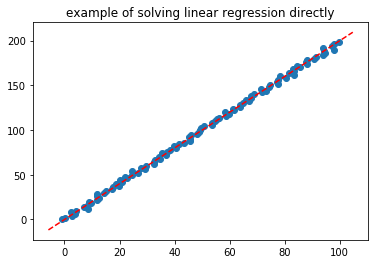

In [7]:
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(x, y)
abline(c, 0)
plt.title('example of solving linear regression directly')
plt.show()


#### Modern Regression has the following components
+ Coefficients (weights)
+ coefficient p_values (availible depending on the method) 
+ interecept (optional)
+ Optimizer (Solver) in most cases OLS (Ordinary Least Squared Regression) but potentilly SDG stochastic grantient descent
+ Loss Function 
    + mean squared error (more sensitive to outliers)
    + root mean squared error
+ Metrics
    + R Squared  (percent of variance explained), between 0,1, in practice should be .7 and higher
        + 1.0 indicattes 100% varience explained
        + 0 indcates 0% varience explained (model is totally worthless)
    + Correlation (between prediction and outcome) between -1 and 1, should be .8 and higher
        + 0 indicates model predictions and actualls are not related (the move independently of eachother)
          
        + 1 indicates as actuals go up, predictions go up by the same ammount
        + -1 indicates the model predicts in the opposite direction (goes down when the actualls go up)
     + MAPE mean average percent error
     + RMSE  mean of all predictins where  sqrt((actual - predicted)^2)
     + MSE mean squared error, mean of all predictins where  (actual - predicted)^2)
        



In [6]:
import pandas as pd
url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD'
data_raw = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# ## download for MAC
# file_path = 'nyc_caraccidents.csv'
# path = Path(file_path)
# response = requests.get(url)

# # write contents of the download 
# path.write_bytes(response.content)

# data = pd.read_csv(file_path)

In [10]:
data.shape

(1384711, 5)

In [8]:
label_col = 'NUMBER OF PERSONS INJURED'
cat_cols = ['CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']
lat_lon_cols = ['LATITUDE', 'LONGITUDE']
data = data_raw[cat_cols  +  lat_lon_cols + [label_col]].dropna()
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].astype(str)
data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].astype(str)
data.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED
count,1.384711e+06,1.384711e+06,1.384711e+06
mean,4.069441e+01,-7.387736e+01,2.612978e-01
std,1.097381e+00,2.284304e+00,6.573835e-01
min,0.000000e+00,-2.013600e+02,0.000000e+00
25%,4.066880e+01,-7.397736e+01,0.000000e+00
50%,4.072255e+01,-7.392988e+01,0.000000e+00
75%,4.076789e+01,-7.386695e+01,0.000000e+00
max,4.334444e+01,0.000000e+00,4.300000e+01


In [ ]:
#### Split Data 

In [13]:
df_train, df_test = train_test_split(data, test_size=0.25, random_state=42)
print('trainset shape {}'.format(df_train.shape))
print('testset shape {}'.format(df_test.shape))

trainset shape (1038533, 5)
testset shape (346178, 5)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
## COntributing Factors
min_df = .01
stop_words = ['and', 'the', 'as', 'that', 'but', 'in', 'back', 'know']

cv = CountVectorizer(min_df=min_df,  stop_words=stop_words,  ngram_range=(1, 3), binary=True)
# fits the count vect with a vocabuary 
cv = cv.fit(data['VEHICLE TYPE CODE 1'] )
cv_feature_names = cv.get_feature_names()
cv_feature_names

['bus',
 'com',
 'com veh',
 'other',
 'passenger',
 'passenger vehicle',
 'pick',
 'pick up',
 'pick up truck',
 'sedan',
 'sport',
 'sport utility',
 'sport utility station',
 'sport utility vehicle',
 'station',
 'station wagon',
 'station wagon sport',
 'taxi',
 'tires',
 'truck',
 'unknown',
 'up',
 'up truck',
 'utility',
 'utility station',
 'utility station wagon',
 'utility vehicle',
 'van',
 'veh',
 'vehicle',
 'wagon',
 'wagon sport',
 'wagon sport utility']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
## COntributing Factors
min_df = .01
stop_words = ['and', 'the', 'as', 'that', 'but', 'in', 'back', 'know']

cv2 = CountVectorizer(min_df=min_df,  stop_words=stop_words,  ngram_range=(2, 3), binary=True)
# fits the count vect with a vocabuary 
cv2 = cv2.fit(data['CONTRIBUTING FACTOR VEHICLE 1'] )
cv_feature_names2 = cv2.get_feature_names()
cv_feature_names2

['backing unsafely',
 'control disregarded',
 'driver inattention',
 'driver inattention distraction',
 'driver inexperience',
 'failure to',
 'failure to yield',
 'fatigued drowsy',
 'following too',
 'following too closely',
 'inattention distraction',
 'lane changing',
 'lane usage',
 'lane usage improper',
 'lost consciousness',
 'of way',
 'or lane',
 'or lane usage',
 'other vehicular',
 'passing or',
 'passing or lane',
 'passing too',
 'passing too closely',
 'right of',
 'right of way',
 'to yield',
 'to yield right',
 'too closely',
 'traffic control',
 'traffic control disregarded',
 'turning improperly',
 'unsafe lane',
 'unsafe lane changing',
 'usage improper',
 'yield right',
 'yield right of']

In [15]:
# define the number of clusters to use (number of centers )
n_centers = 10

# init the scaler normalizes values
scaler = StandardScaler()

# int the kmeans model
binner = KMeans(n_clusters=n_centers)

# package in a pipeline
lat_lon_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                      ('scaling', scaler), 
                                      ('binning and ohe', binner)])
lat_lon_transformer.fit(df_train[lat_lon_cols])

# this test thje transform and gets a bin number for each row, to plot
bins = np.argmin(lat_lon_transformer.transform(df_train[lat_lon_cols]), axis=1)

#example output form the lat lon transformer 
lat_lon_feature_names = list(range(lat_lon_transformer.steps[-1][1].n_clusters))
lat_lon_feature_names = ['Distance to loc:' + str(v) for v in lat_lon_feature_names]

# show an example of the transformation
pd.DataFrame(lat_lon_transformer.transform(df_train[lat_lon_cols].head(2)), columns=lat_lon_feature_names)



,Distance to loc:0,Distance to loc:1,Distance to loc:2,Distance to loc:3,Distance to loc:4,Distance to loc:5,Distance to loc:6,Distance to loc:7,Distance to loc:8,Distance to loc:9
0,0.120297,49.127180,56.293955,0.091372,17.235119,0.164562,0.046788,0.114279,0.193324,9.507644
1,0.100693,49.158637,56.208219,0.034736,17.320896,0.182473,0.088815,0.025957,0.101171,9.425553


In [20]:
feature_names =  cv.get_feature_names() + cv2.get_feature_names() + lat_lon_feature_names 
len(feature_names)
#

79

In [23]:
from scipy.sparse import hstack
def clean_data(df):
    f1 = cv.transform(df['VEHICLE TYPE CODE 1'] )
    f2 = cv2.transform(df['CONTRIBUTING FACTOR VEHICLE 1'] )
    f3 = lat_lon_transformer.transform(df[lat_lon_cols])
    return hstack((f1, f2, f3))

X_train  =  clean_data(df_train)
X_test =  clean_data(df_test)
y_train = df_train['NUMBER OF PERSONS INJURED'].values
y_test = df_test['NUMBER OF PERSONS INJURED'].values


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)
model.coef_

array([-1.72016495e-01, -2.40055901e-01, -1.79327878e-02, -2.42497051e-01,
       -3.12368507e-02, -3.12368507e-02, -2.44688394e-01,  6.97937079e-02,
        6.97937079e-02, -1.65455787e-01,  3.39476998e-02,  3.39476998e-02,
        3.14185605e-03,  3.08058427e-02,  3.39476998e-02,  3.39476998e-02,
        3.08058427e-02, -1.22340593e-01, -1.79327878e-02, -2.77313107e-01,
       -6.95891544e-02,  6.97937079e-02,  6.97937079e-02,  3.39476998e-02,
        3.14185605e-03,  3.14185605e-03,  3.08058427e-02, -2.12329160e-01,
       -1.79327878e-02, -1.27378806e-01, -3.69508438e-01,  3.08058427e-02,
        3.08058427e-02, -1.60996442e-01,  3.64971894e-02,  2.59635445e-03,
        2.59635445e-03, -2.57051235e-02,  3.72039522e-02,  1.56988307e-02,
        1.10171171e-04,  4.49933535e-02,  4.49933535e-02,  2.59635445e-03,
       -3.54157393e-02, -1.83188984e-02, -1.83188984e-02, -8.95305865e-02,
        1.56988307e-02, -1.83188984e-02, -1.83188984e-02, -4.32158799e-02,
       -1.83188984e-02, -

In [28]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.026120578051383236

In [25]:
output = pd.DataFrame({'features':feature_names, 'coef':model.coef_}).sort_values('coef' , ascending=False)
output.head(13)

,features,coef
69,Distance to loc:0,2.319320
76,Distance to loc:7,0.643833
78,Distance to loc:9,0.481201
75,Distance to loc:6,0.404643
61,traffic control,0.270032
77,Distance to loc:8,0.257855
8,pick up truck,0.069794
21,up,0.069794
22,up truck,0.069794
7,pick up,0.069794


In [27]:
output.tail(13)

,features,coef
9,sedan,-0.165456
0,bus,-0.172016
27,van,-0.212329
1,com,-0.240056
3,other,-0.242497
6,pick,-0.244688
19,truck,-0.277313
30,wagon,-0.369508
73,Distance to loc:4,-0.689278
70,Distance to loc:1,-1.455876


In [40]:

from statsmodels.api import GLM
m = GLM(exog = X_train.toarray(), endog=np.reshape(y_train, (-1,1))).fit()
m.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:              1038533
Model:                            GLM   Df Residuals:                  1038492
Model Family:                Gaussian   Df Model:                           40
Link Function:               identity   Scale:                         0.42235
Method:                          IRLS   Log-Likelihood:            -1.0260e+06
Date:                Wed, 16 Oct 2019   Deviance:                   4.3861e+05
Time:                        15:32:12   Pearson chi2:                 4.39e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1650      0.007    -24.152      0.000      -0.178      -0.152
x2            -0.2377      0.136     -1.753      0.080      -0.503       0.028
x3            -0.0177      0.045     -0.391      0.696      -0.106       0.071
x4            -0.2401      0.007    -36.245      0.000      -0.253      -0.227
x5            -0.0341      0.004     -8.598      0.000      -0.042      -0.026
x6            -0.0341      0.004     -8.598      0.000      -0.042      -0.026
x7            -0.1689      0.163     -1.039      0.299      -0.487       0.150
x8             0.0531      0.041      1.306      0.192      -0.027       0.133
x9             0.0531      0.041      1.306      0.192      -0.027       0.133
x10           -0.1655      0.004    -37.172      0.000      -0.174      -0.157
x11            0.0339      0.029      1.190      0.234      -0.022       0.090
x12            0.0339      0.029      1.190      0.234      -0.022       0.090
x13            0.0039      0.018      0.218      0.828      -0.031       0.039
x14            0.0300      0.011      2.788      0.005       0.009       0.051
x15            0.0339      0.029      1.190      0.234      -0.022       0.090
x16            0.0339      0.029      1.190      0.234      -0.022       0.090
x17            0.0300      0.011      2.788      0.005       0.009       0.051
x18           -0.1235      0.005    -24.558      0.000      -0.133      -0.114
x19           -0.0177      0.045     -0.391      0.696      -0.106       0.071
x20           -0.2815      0.008    -35.704      0.000      -0.297      -0.266
x21           -0.0734      0.007    -10.508      0.000      -0.087      -0.060
x22            0.0531      0.041      1.306      0.192      -0.027       0.133
x23            0.0531      0.041      1.306      0.192      -0.027       0.133
x24            0.0339      0.029      1.190      0.234      -0.022       0.090
x25            0.0039      0.018      0.218      0.828      -0.031       0.039
x26            0.0039      0.018      0.218      0.828      -0.031       0.039
x27            0.0300      0.011      2.788      0.005       0.009       0.051
x28           -0.2183      0.006    -35.613      0.000      -0.230      -0.206
x29           -0.0177      0.045     -0.391      0.696      -0.106       0.071
x30           -0.1209      0.009    -13.730      0.000      -0.138      -0.104
x31           -0.3735      0.196     -1.906      0.057      -0.758       0.011
x32            0.0300      0.011      2.788      0.005       0.009       0.051
x33            0.0300      0.011      2.788      0.005       0.009       0.051
x34           -0.1583      0.003    -47.126      0.000      -0.165      -0.152
x35            0.0163      0.016      0.997      0.319      -0.016       0.048
x36            0.0029      0.001      4.974      0.000       0.002       0.004
x3

In [51]:
results = pd.DataFrame({'p': m.pvalues, 'coefs': m._results.params, 'names':feature_names})
results.loc[results['p'] < .05].sort_values('coefs')

,p,coefs,names
75,2.639024e-121,-1.304420,Distance to loc:6
76,0.000000e+00,-1.032502,Distance to loc:7
74,1.468960e-57,-0.843297,Distance to loc:5
19,3.455059e-279,-0.281483,truck
3,1.201325e-287,-0.240086,other
27,8.873022e-278,-0.218331,van
9,1.930893e-302,-0.165481,sedan
0,7.135932e-129,-0.165034,bus
33,0.000000e+00,-0.158309,backing unsafely
17,3.571891e-133,-0.123505,taxi
